In [1]:
#Importing the datasets
import pandas as pd
import numpy as np


train=pd.read_csv("train_hp.csv", encoding="Latin-1")
test=pd.read_csv("test_hp.csv", encoding="Latin-1")
sample_submission=pd.read_csv("hp_sample_submission.csv", encoding="Latin-1")

print(train.info())
print(test.info())

print(train.shape)
print(test.shape)
print(sample_submission.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
#For all Kaggle competitions, we should use train only to divide into train and test
# as test test given in competitions will not have target variable and we don't know performance without target variable
#Hence train_test_split to divide the train data into train vs test
#However, data preperation techniques needs to be applied both to training and testing tests
#As we don't have separate testing test here, we will apply data prep to train and split into train vs test after data prep

In [675]:
#Technique 0.1: Pandas Profiling- A single step data exploratory technique
import pandas_profiling as pdf
from pandas_profiling import ProfileReport

In [3]:
#Installing the package of Pandas Profiling
!pip install pandas_profiling

In [4]:
#Create a summary report with Pandas Profiling

pdf.ProfileReport(train)

In [12]:
#Technique 0.2: Checking the train data set to get feel of the dataset
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
#Technique 0.3: To research on the variables (thier type and number of missing values)
train.info()
#From below, you can notice that some of the features like Alley do have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Technique 0.4: Analyzing and researching the target variable for outliers, skewness 

train['SalePrice'].describe()
#So, from the output, we can make out that 75% of our values are below 214,000 whereas the maximum sale price of a 
#house is 755,000. There is a significant difference between these two which clearly denotes that the target variable 
#has some outliers.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

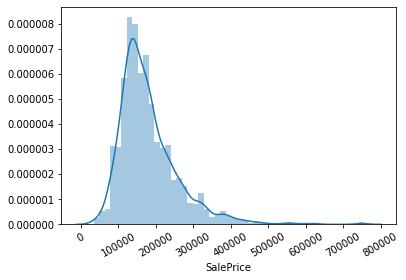

In [5]:
#Let's visualize the distribution of SalePrice here
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['SalePrice'])
plt.xticks(rotation=30);

In [6]:
#You can see that a lot of the sale prices are clustered between the 100,000 to 200,000 range. 
#But, due to some high sale prices of a few houses, our data does not seem to be centered around any value. 
#This means that the sale prices are not symmetrical about any value. 
#This asymmetry present in our data distribution is called Skewness. In our case, the data distribution is positively-skewed
#(or right-skewed).

In [7]:
#We can check the skewness in our data explicitly using the DataFrame.skew() function:
#The skewness value is not close to 0 which indicates the outliers in the data
print('Skewness = ',train['SalePrice'].skew())

Skewness =  1.8828757597682129


In [8]:
#We have got a positive value here because our data distribution is skewed towards the right due to the high sale prices 
#of some houses.
#Our problem requires us to predict the sale price of houses – a regression problem. 
#So, the first model that we will be fitting to our dataset is a linear regression model. 
#But the skewness in our target feature poses a problem for a linear model because some values will have an 
#asymmetric effect on the prediction. Having a normally distributed data is one of the assumptions of linear regression!  
#But we’ll handle this later when we are transforming our features.

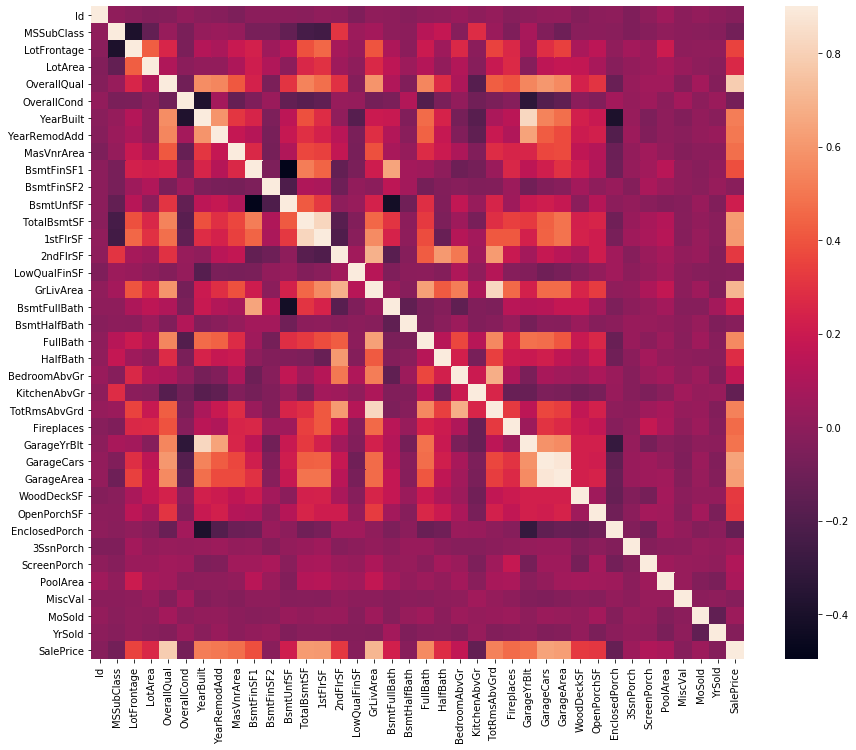

In [9]:
#Technique 0.5- Analzying more about correlated features
#In the basic steps, we are just analyzing/exploring the relationship between highly correlated variables
#Removing them will be handled later
corr = train.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr,vmax=0.9,square=True)
plt.show();

In [10]:
#Heatmaps are a great tool to quickly visualize how a feature correlates with the remaining features. 
#Some striking correlation between features that I can see from the heatmap are:
#Below are the features that has more white color in the above HeatMap

#GrLivArea and TotRmsAbvGrd 
#GarageYrBlt and YearBuilt
#1stFlrSF and TotalBsmtSF
#OverallQual and SalePrice
#GarageArea and GarageCars

In [11]:
#We can plot these features to understand the relationship between them:

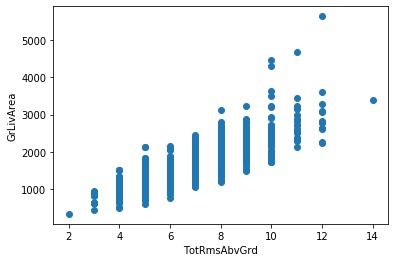

In [14]:
#GrLivArea and TotRmsAbvGrd
plt.scatter(x=train['TotRmsAbvGrd'], y=train['GrLivArea'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')
plt.show();
#It seems obvious that the total number of rooms above the ground should increase with increasing living area above ground

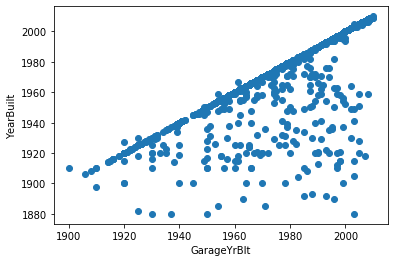

In [15]:
# GarageYrBlt and YearBuilt
plt.scatter(x=train['GarageYrBlt'], y=train['YearBuilt'])
plt.xlabel('GarageYrBlt')
plt.ylabel('YearBuilt')
plt.show();

#This relationship is interesting because we can see some linear relationship forming between the Year the house was built 
#and the Year the garage was built. Think about it – it seems intuitive that garages would have been built either 
#simultaneously with the house or after it was constructed, and not before it. 
#Therefore, you can see that most of the points stay on or below the linear line.

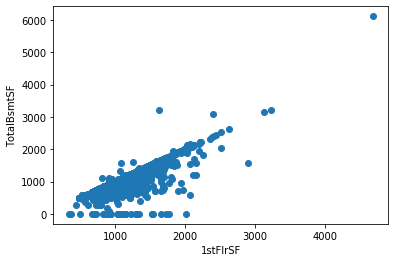

In [16]:
# 1stFlrSF and TotalBsmtSF
plt.scatter(x=train['1stFlrSF'], y=train['TotalBsmtSF'])
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')
plt.show();

#Again, we can see a linear relationship between these two features, and most of the dots lie below the line.
#Most houses have a basement area less than or equivalent to the first-floor area. Although we can see some houses 
#with basement area more than the first-floor area. What do you think the reason could be? 

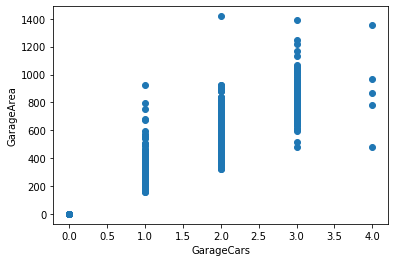

In [17]:
# GarageCars and SalePrice
plt.scatter(x=train['GarageCars'], y=train['GarageArea'])
plt.xlabel('GarageCars')
plt.ylabel('GarageArea')
plt.show();
#Again, the number of cars that can fit in a garage would increase with its area. 

In [18]:
#Technique 0.6- Analyzing the top features that has close relationship/strong correlation with target
#We identify the top features and check for outliers in the data for these top features
#If outliers exist for these top features, then we remove those rows/observations
#Note: The top features identified below should not contain any NULL values
#In case of null values- we can either check for null values for the top features and remove the features with null values
# (OR) Completely skip this Technique 0.6 step and filter the outliers at the end before you build the model


#For now, let’s see how the features correlate with our target feature – SalePrice:
# correlation
corr = train.corr()
# sort in descending order
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]

corr_top

#I will save all of them(below) in my “top_features” list for reference later on.

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [19]:
#Checking for null values among the top features listed below.
#This step will tell you whether you need to skip this procedure of removing outliers
#As all the columns are 0, we have no missing values in top features

train[top_features].isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [20]:
#This step will give you the data type for the top featues, but also non null values.
#You can also use this step to check null values as non null values are listed anyways

train[top_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   GarageCars    1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   YearBuilt     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


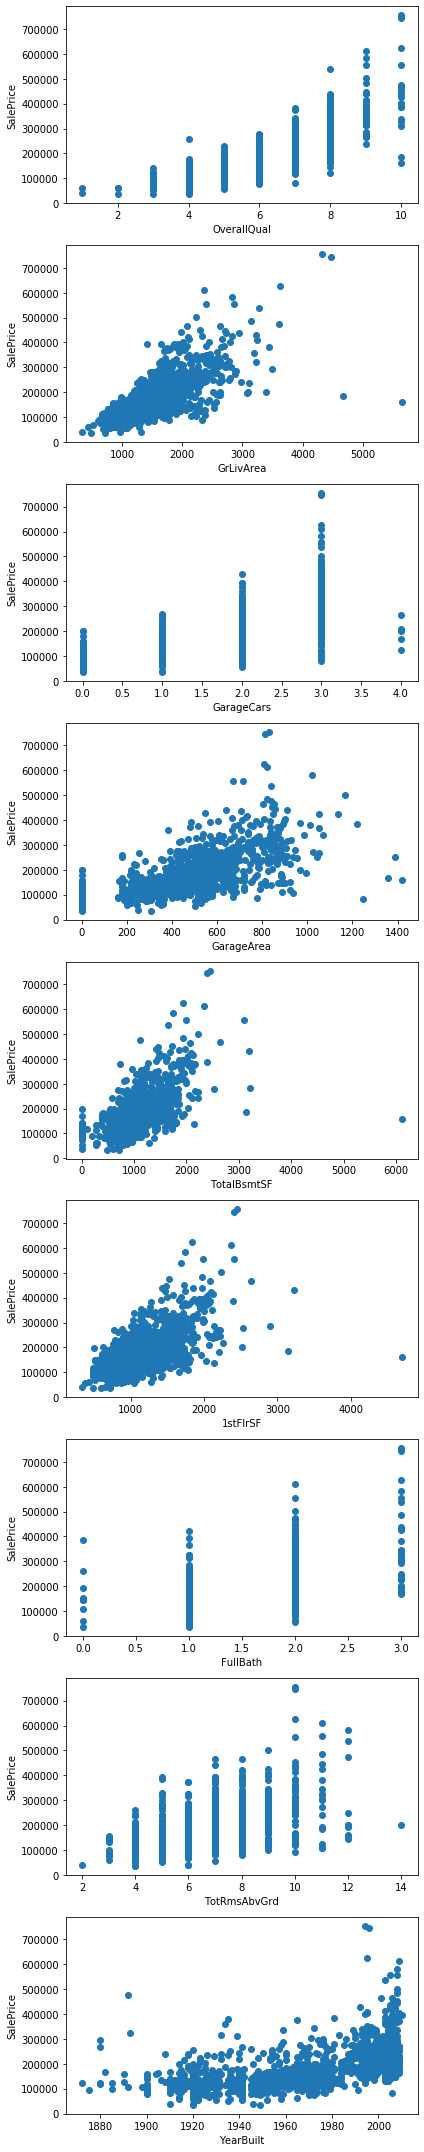

In [21]:
# Top features and SalePrice
#The features given here manually entered from the list of top features listed above
#In case of null values for the top features, do not enter them here manually


numeric_cols = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']
nominal_cols = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']

fig,ax=plt.subplots(nrows=9,ncols=1,figsize=(6,30))
for i in range(len(top_features)):    

    ax[i].scatter(x=train[top_features[i]], y=train['SalePrice'])
    ax[i].set_xlabel('%s'%(top_features[i]))
    ax[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.savefig('./Top_featuresvsSalePrice.jpg',dpi=300,bbox_inches='tight')
plt.show();

In [22]:
#Well, you must have noticed some points in most of these plots are out of their usual place and tend to break the 
#pattern in the feature. These are called Outliers. Outliers affect the mean and standard deviation of the dataset 
#which can affect our predicted values.

#For example, in the feature GrLivArea, notice those two points in the bottom right? An above-ground living area of 4500 
#square feet for just 200,000 while those with 3000 square feet sell for upwards of 200,000! Seems a bit strange, doesn’t it

#Let’s take another example, this time of TotalBsmtSF. Notice the point in the bottom right? It doesn’t make sense.

#These outlier values need to be dealt with or they will affect our predictions. We can deal with them in a number of 
#different ways and we’ll handle them later in the preprocessing section next.

In [23]:
#Technique 0: Handling outliers using the concept of Interquartile Range
#It's always a good idea to handle outliers on top features so that particualr data points can be removed completely
#as outliers on most significnat features can reduce the overall quality of the model

print(train.shape)

Q1 = []
Q3 = []
Lower_bound = []
Upper_bound = []
Outliers = []


for i in top_features:
    
    # 25th and 75th percentiles
    q1, q3 = np.percentile(train[i],25), np.percentile(train[i],75)
    # Interquartile range
    iqr = q3 - q1
    # Outlier cutoff
    cut_off = 1.5*iqr
    # Lower and Upper bounds
    lower_bound = q1-cut_off
    upper_bound = q3+cut_off
        
    # save outlier indexes
    outlier = [x for x in train.index if train.loc[x,i]<lower_bound or train.loc[x,i]>upper_bound]
    
    # append values for DataFrame
    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    
    try:
        train.drop(outlier,inplace=True,axis=0)
    except:
        continue

df_out = pd.DataFrame({'Column':top_features,'Q1':Q1,'Q3':Q3,'Lower bound':Lower_bound,'Upper_bound':Upper_bound,'No. of outliers':Outliers})    
df_out.sort_values(by='No. of outliers',ascending=False)



(1460, 81)


Column       Q1       Q3  Lower bound  Upper_bound  No. of outliers
4   TotalBsmtSF   792.75  1266.25       82.500     1976.500               58
1     GrLivArea  1131.00  1778.25      160.125     2749.125               31
3    GarageArea   325.25   576.00      -50.875      952.125               14
7  TotRmsAbvGrd     5.00     7.00        2.000       10.000               11
5      1stFlrSF   866.00  1343.50      149.750     2059.750                7
2    GarageCars     1.00     2.00       -0.500        3.500                5
8     YearBuilt  1954.00  2000.00     1885.000     2069.000                5
0   OverallQual     5.00     7.00        2.000       10.000                2
6      FullBath     1.00     2.00       -0.500        3.500                0

In [24]:
print(train.shape)
#Now, you can see that all outliers are removed from data and the obs are reduced from 1460 to 1327 after removing outliers

(1327, 81)


In [25]:
#Technique 0.7- Ground work for making data ready for data preparation
#Now, all the data preparation steps except outlier removal should be applied on train and test data
#Because for example: if you create new features in train data and if they don't appear in test data, you will get error
#And the Technique 0.6 of filtering outliers should only be applied to train rows because we cannot filter test rows
#as we need to predict for every test row
#Hence, we are concatenating train and test after taking care of outliers
#if at all in case of null of values and if Technique 0.6 is skipped-then outliers should be removed at the end of
#data prep steps, after you separate train vs test again because test data will be concatenated with train here
#and if used without separation can cause some test rows also to get removed

#Before we start handling the missing values in the data, I am going to make a few tweaks to the train and test dataframes.

#I am going to concatenate the train and test dataframes into a single dataframe. 
#This will make it easier to manipulate their data. Along with that, I will make a few changes to each of them

#Store the number of rows in train dataframe to separate train and test dataframe later on
#Drop Id from train and test because it is not relevant for predicting sale prices
#Take the log transformation of target feature using np.log() to deal with the skewness in the data
#Drop the target feature as it is not present in test dataframe
#Concatenate train and test datasets


#train rows
ntrain = train.shape[0]

#save log transform of target feature
#The below step of log transfrom should only be used if the target variable has skewed distribution
target = np.log(train['SalePrice'])
#target = train['SalePrice']

#drop Id and SalePrice from train dataframe
train.drop(['Id','SalePrice'],inplace=True,axis=1)

#store test Id
test_id = test['Id']
#drop test Id
test.drop(['Id'],inplace=True,axis=1)

#concatenate train and test dataframes
train = pd.concat([train,test])

#Now train contains all rows of train+test

In [26]:
#We can check the skewness in our data explicitly using the DataFrame.skew() function:
print('Skewness = ',target.skew()) 

#Skwness of target reduced from 1.88 to -0.12 which is close to 0 (hence targed is close to normal distribution now)

Skewness =  -0.12943405605773148


In [27]:
#The concatenated train which contains train rows vs test rows is 2786
train.shape

(2786, 79)

In [28]:
#Data Preparation Starts here

#Technique 1: One Hot Encoding

#Note: Label Encoding can be done only with Categorical data types if we require certain values like Small=1, M-2, Large-3
#Custom binary encoding can be done with categorical variables that has 2 values like 0 and 1
#For now, I have done One Hot Encoding for all categorical variables
#For other encoding, check codes from All_DataPrep_Steps Notebook

#One Hot Encoding should only be applied only to categorical variables

#In order to create these numerical features from categorical more accurately, we can analzye the cat columns more detailed
# and check if the cat columns do have 2 domain code values/ or if there is any order in categories like ordinal varaible

#1)In case of only 2 domain code values for cat variable- you can just use label encoding like 0/1 for same column
#instead of 2 columns which will be created via One Hot Encoding

#2) In case of cat variable- with more than 2 categories, we can also analyze if that variable is ordinal variable 
#rather than nominal. In case of ordinal, there will be some natural order. Hence, you can use 1-Small, 2-Medium,3-Large
# for the same variable instead of creating 3 variables with OneHot Encoding

#However, I haven't followed 1) and 2) listed above and directly used OneHot Encoding, but you can use it to get more
#accurate columns

#Categorical prints the entire dataset
categorical = train.select_dtypes(include='object')
#Categorical_cols gives you the columns
categorical_cols=categorical.columns
#Categorical_cols_list will give you the columns in the form of list
categorical_cols_list=list(categorical_cols)

print(categorical_cols_list)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [29]:
#del train_new #This statement is used to delete the dataframe that is already created and doesn't apply duriing first run

In [30]:
#1.1 (contd) Creating categorical encoded variabels and adding them to the dataset

train_new=train #Here you are copying the train dataset into train_new

#You need to make sure to use prefix and prefix sep and column in order to get meaningful column names
# that has ColumnName_DomainCode value for that column

for column in categorical_cols_list:
    train_new= pd.concat([train_new,pd.get_dummies(train_new[column], prefix=column,prefix_sep='_', columns=categorical_cols_list)],axis=1)
    train_new=train_new
    
train_new.head()

#Checking whether the domain code values of that column matches with the created column names using value_counts for 2 var.

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... SaleType_ConLw SaleType_New  \
0         Lvl    AllPub    Inside  ...              0            0   
1         Lvl    AllPub       FR2  ...              0            0   
2         Lvl    AllPub    Inside  ...              0            0   
3         Lvl    AllPub    Corner  ...              0            0   
4         Lvl    AllPub       FR2  ...              0            0   

  SaleType_Oth SaleType_WD SaleCondition_Abnorml SaleCondition_AdjLand  \
0            0           1                     0                     0   
1            0           1                     0                     0   
2            0           1                     0                     0   
3            0           1                     1                     0   
4            0           1                     0                     0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 327 columns]

In [31]:
#When you see the train_new dataset at the end, you noticed that the original categorical variables also appeared 
#It's time to remove them so that subsequent dataset contains only numeric features

train_new.info()

#You can see that there are 3 float types, 35 int types, 43 object types and 252 uint types
#43 with object type are categorical variables which needs to be removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 1458
Columns: 327 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), object(43), uint8(248)
memory usage: 2.4+ MB


In [32]:
#1.2 Removing all the categorical columns, there by preserving only numeric features
#Make sure the data types you are entering below covers all the data types of the features using above info()

numerics = ['int16','uint8','int32', 'int64', 'float16', 'float32', 'float64']
#Numeric prints the entire dataset
numeric = train_new.select_dtypes(include=numerics)
#Numeric_cols gives you the columns
numeric_cols=numeric.columns
#Numeric_cols_list will give you the columns in the form of list
numeric_cols_list=list(numeric_cols)

print(numeric_cols_list)

train_new=train_new[numeric_cols_list]

train_new.head()

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborho

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0       706.0         0.0  ...               0   
1          1976         0.0       978.0         0.0  ...               0   
2          2002       162.0       486.0         0.0  ...               0   
3          1970         0.0       216.0         0.0  ...               0   
4          2000       350.0       655.0         0.0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 284 columns]

In [33]:
#Now, you could see only numeric features in train_new dataset above
train_new.shape

(2786, 284)

In [34]:
#Technique 2: Handling Missing data

#Null values
train_new.isna().sum().sort_values(ascending=False).head(20)

#You can see the list of missing values for each column sorted in descending order

LotFrontage              464
GarageYrBlt              147
MasVnrArea                21
BsmtFullBath               2
BsmtHalfBath               2
GarageArea                 1
BsmtFinSF1                 1
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
GarageCars                 1
Condition1_RRAe            0
Condition1_RRAn            0
Condition1_RRNe            0
Condition1_RRNn            0
Condition2_Artery          0
SaleCondition_Partial      0
Condition2_Feedr           0
Condition2_Norm            0
Condition2_PosA            0
dtype: int64

In [35]:
train_new.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0       706.0         0.0  ...               0   
1          1976         0.0       978.0         0.0  ...               0   
2          2002       162.0       486.0         0.0  ...               0   
3          1970         0.0       216.0         0.0  ...               0   
4          2000       350.0       655.0         0.0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 284 columns]

In [36]:
#2.1 Finding out missing values in the form of List so that you can copy in the later part of code to drop them
#after you perform the imputation

train_new.columns[train_new.isnull().any()]

missing_columns=train_new.columns[train_new.isnull().any()]

print(missing_columns)

#Below list contains the name of missing columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')


In [37]:
#2.2 Simple Random Imputation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model


def random_imputation(train_new, feature):

    number_missing = train_new[feature].isnull().sum()
    observed_values = train_new.loc[train_new[feature].notnull(), feature]
    train_new.loc[train_new[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return train_new


for feature in missing_columns:
    train_new[feature + '_imp'] = train_new[feature]
    train_new = random_imputation(train_new, feature)
    

train_new.head()
#This method produces original column as well as imputed columns. In order to remove original column you can use below


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  MasVnrArea_imp  \
0          2003       196.0       706.0         0.0  ...           196.0   
1          1976         0.0       978.0         0.0  ...             0.0   
2          2002       162.0       486.0         0.0  ...           162.0   
3          1970         0.0       216.0         0.0  ...             0.0   
4          2000       350.0       655.0         0.0  ...           350.0   

   BsmtFinSF1_imp  BsmtFinSF2_imp  BsmtUnfSF_imp  TotalBsmtSF_imp  \
0           706.0             0.0          150.0            856.0   
1           978.0             0.0          284.0           1262.0   
2           486.0             0.0          434.0            920.0   
3           216.0             0.0          540.0            756.0   
4           655.0             0.0          490.0           1145.0   

   BsmtFullBath_imp  BsmtHalfBath_imp  GarageYrBlt_imp  GarageCars_imp  \
0               1.0               0.0           2003.0             2.0   
1               0.0               1.0           1976.0             2.0   
2               1.0               0.0           2001.0             2.0   
3               1.0               0.0           1998.0             3.0   
4               1.0               0.0           2000.0             3.0   

   GarageArea_imp  
0           548.0  
1           460.0  
2           608.0  
3           642.0  
4           836.0  

[5 rows x 295 columns]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  MasVnrArea_imp  \
0          2003       196.0       706.0         0.0  ...           196.0   
1          1976         0.0       978.0         0.0  ...             0.0   
2          2002       162.0       486.0         0.0  ...           162.0   
3          1970         0.0       216.0         0.0  ...             0.0   
4          2000       350.0       655.0         0.0  ...           350.0   

   BsmtFinSF1_imp  BsmtFinSF2_imp  BsmtUnfSF_imp  TotalBsmtSF_imp  \
0           706.0             0.0          150.0            856.0   
1           978.0             0.0          284.0           1262.0   
2           486.0             0.0          434.0            920.0   
3           216.0             0.0          540.0            756.0   
4           655.0             0.0          490.0           1145.0   

   BsmtFullBath_imp  BsmtHalfBath_imp  GarageYrBlt_imp  GarageCars_imp  \
0               1.0               0.0           2003.0             2.0   
1               0.0               1.0           1976.0             2.0   
2               1.0               0.0           2001.0             2.0   
3               1.0               0.0           1998.0             3.0   
4               1.0               0.0           2000.0             3.0   

   GarageArea_imp  
0           548.0  
1           460.0  
2           608.0  
3           642.0  
4           836.0  

[5 rows x 295 columns]

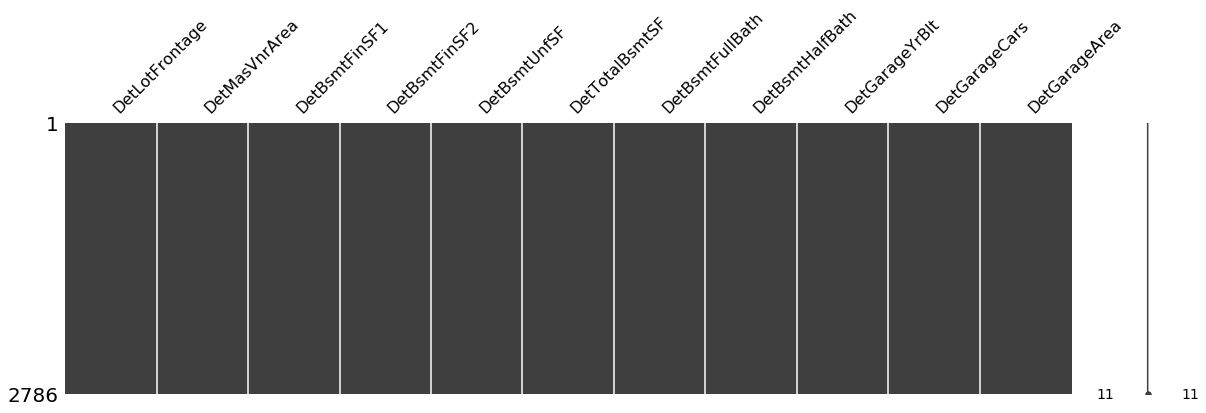

In [38]:
#2.3 Deterministic Imputation
#This imputation takes care of imputed variables created using above technique 4.1
#If the imputed variable is not created, or if this is first form of imputation in code, make sure you remove 
#feature+_imp in the list of parameters otherwise you will get error

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = train_new[feature + "_imp"]
    parameters = list(set(train_new.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = train_new[parameters], y = train_new[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    #deter_data.loc[train_new[feature].isnull(), "Det" + feature] = model.predict(train_new[parameters])[train_new[feature].isnull()]
    
    
mno.matrix(deter_data, figsize = (20,5))

train_new.head()

#Now, you can see that for all missing columns in the data, there are imputed columns created at the end
#However, the original missing columns also do appear which we need to remove

In [39]:
#2.4 Now, we are dropping original missing columns
#Missing values entered in the drop statement below can be pulled from the output of 2.1 above

print(missing_columns)
train_new=train_new.drop(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],axis=1) #Make sure you initialize to train_new. 
                                                                            #Otherwise, columns will not drop
train_new.head()

#Now, you can see that the original missing columns do not appear
#However, the imputed columns for every drop of original column appear at the end

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')


MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  MasVnrArea_imp  \
0       856       854             0       1710  ...           196.0   
1      1262         0             0       1262  ...             0.0   
2       920       866             0       1786  ...           162.0   
3       961       756             0       1717  ...             0.0   
4      1145      1053             0       2198  ...           350.0   

   BsmtFinSF1_imp  BsmtFinSF2_imp  BsmtUnfSF_imp  TotalBsmtSF_imp  \
0           706.0             0.0          150.0            856.0   
1           978.0             0.0          284.0           1262.0   
2           486.0             0.0          434.0            920.0   
3           216.0             0.0          540.0            756.0   
4           655.0             0.0          490.0           1145.0   

   BsmtFullBath_imp  BsmtHalfBath_imp  GarageYrBlt_imp  GarageCars_imp  \
0               1.0               0.0           2003.0             2.0   
1               0.0               1.0           1976.0             2.0   
2               1.0               0.0           2001.0             2.0   
3               1.0               0.0           1998.0             3.0   
4               1.0               0.0           2000.0             3.0   

   GarageArea_imp  
0           548.0  
1           460.0  
2           608.0  
3           642.0  
4           836.0  

[5 rows x 284 columns]

In [40]:
#2.5 Imputing missing values can also be done separately for nominal, ordinal and numeric features check below link
#https://www.analyticsvidhya.com/blog/2020/06/get-started-kaggle-competitions/?utm_source=KJLinkedin&utm_medium=post&utm_campaign=24_june_new_article


In [41]:
#3.Feature Engineering
#Creation of 3 new additional features from existing columns
#Creation of additional features- requires you to understand more about the variables, business behind it
#You can create as many was you want as long as you have the correct business knowledge and fields

# Total surface area of house
train_new['TotalSF'] = train_new.apply(lambda x: x['1stFlrSF'] + x['2ndFlrSF'] + x['TotalBsmtSF_imp'], axis=1)

# Total number of bathrooms in the house
train_new['TotalBath'] = train_new.apply(lambda x: x['FullBath'] + 0.5*x['HalfBath'] + x['BsmtFullBath_imp'] + 0.5*x['BsmtHalfBath_imp'], axis=1)

# Total Porch area in the house
train_new['TotalPorch'] = train_new.apply(lambda x: x['OpenPorchSF'] + x['EnclosedPorch'] + x['3SsnPorch'] + x['ScreenPorch'], axis=1)


In [42]:
train_new.head()
#The final train_new after 4 steps contain 287 columns
#The additional features created are added at the end of the dataset

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  BsmtUnfSF_imp  \
0       856       854             0       1710  ...          150.0   
1      1262         0             0       1262  ...          284.0   
2       920       866             0       1786  ...          434.0   
3       961       756             0       1717  ...          540.0   
4      1145      1053             0       2198  ...          490.0   

   TotalBsmtSF_imp  BsmtFullBath_imp  BsmtHalfBath_imp  GarageYrBlt_imp  \
0            856.0               1.0               0.0           2003.0   
1           1262.0               0.0               1.0           1976.0   
2            920.0               1.0               0.0           2001.0   
3            756.0               1.0               0.0           1998.0   
4           1145.0               1.0               0.0           2000.0   

   GarageCars_imp  GarageArea_imp  TotalSF  TotalBath  TotalPorch  
0             2.0           548.0   2566.0        3.5        61.0  
1             2.0           460.0   2524.0        2.5         0.0  
2             2.0           608.0   2706.0        3.5        42.0  
3             3.0           642.0   2473.0        2.0       307.0  
4             3.0           836.0   3343.0        3.5        84.0  

[5 rows x 287 columns]

In [43]:
#4. Removing correlated features

##In order to avoid overfitting, feature selection should only be applied to training data
#However,we did for both train and test here

#This applies to only numeric features, you will get error when we use categorical features
#Using this step before One Hot Encoding on training data, we will not have chance to remove constant columns of 
#categorical variables because now as all variables are converted from cat to int for which we can apply 
#removal of correlated features

#4.0.1 Prep steps for correlation
#For various Variance threshold, we need to make sure all the columns are converted into int 
#Although we know all are numerical features above this step, we are just using below step to make sure 
#that all are numerical features
#From below you can see that float64(14), int64(25), uint8(248). Make sure below numerics captures all dtypes of 
#numerical features

train_new.info() #All columns are float64, int64 and uint8

numerics = ['int16','uint8','int32', 'int64', 'float16', 'float32', 'float64']

#Numeric prints the entire dataset
numeric = train_new.select_dtypes(include=numerics)
#Numeric_cols gives you the columns
numeric_cols=numeric.columns
#Numeric_cols_list will give you the columns in the form of list
numeric_cols_list=list(numeric_cols)

print(numeric_cols_list)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 1458
Columns: 287 entries, MSSubClass to TotalPorch
dtypes: float64(14), int64(25), uint8(248)
memory usage: 1.5 MB
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborh

In [44]:
#del train_new_final #This deletes the dataframe in subsequent runs and it is not required in first run

In [45]:
train_new_final=pd.DataFrame() #You can use this statement to generate empty dataframe

#Although correlation accepts numerical features, everything need to be converted into int which will be taken care below
for column in numeric_cols_list:
    #train_new[column]=train_new[column].fillna(0)- no need as imputation was performed before correlation
    train_new[column]=train_new[column].astype(int)
    train_new_final[column]=train_new[column] #This will limit the train_new_final to contain only numeric features
    
train_new_final.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  BsmtUnfSF_imp  \
0       856       854             0       1710  ...            150   
1      1262         0             0       1262  ...            284   
2       920       866             0       1786  ...            434   
3       961       756             0       1717  ...            540   
4      1145      1053             0       2198  ...            490   

   TotalBsmtSF_imp  BsmtFullBath_imp  BsmtHalfBath_imp  GarageYrBlt_imp  \
0              856                 1                 0             2003   
1             1262                 0                 1             1976   
2              920                 1                 0             2001   
3              756                 1                 0             1998   
4             1145                 1                 0             2000   

   GarageCars_imp  GarageArea_imp  TotalSF  TotalBath  TotalPorch  
0               2             548     2566          3          61  
1               2             460     2524          2           0  
2               2             608     2706          3          42  
3               3             642     2473          2         307  
4               3             836     3343          3          84  

[5 rows x 287 columns]

In [46]:
#4.1 Handling of constant columns with Variance Threshold
from sklearn.feature_selection import VarianceThreshold

train_features=train_new_final[numeric_cols_list]

print(train_features)

constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(train_features)

#train_new_final originally contains 287 variables and after the filter of constant variance it contains 287 variables
len(train_features.columns[constant_filter.get_support()]) #This will give you number of non-contant columns

#No columns are constant columns

      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1454         160     1936            4            7       1970          1970   
1455         160     1894            4            5       1970          1970   
1456          20    20000            5            7       1960          1996   
1457          85    10441            5            5       1992          1992   
1458          60     9627            7            5       1993          1994   

      1stFlrSF  2ndFlrSF  LowQualFinSF 

287

In [47]:
#Printing contant columns

constant_columns=[column for column in train_features.columns
                 if column not in train_features.columns[constant_filter.get_support()]]

print(constant_columns) #No constant columns
print(len(constant_columns)) #0 constant columns

[]
0


In [48]:
#To remove constant features from training and test sets, we can use transform
#However, in all Kaggle competitions, we neeed to use train and divide that train into train and test

train_features=constant_filter.transform(train_features)
#test_features=constant_filter.transform(test_features)
train_new_final.shape

#Same number of 287 columns are returned as there are no constant columns

(2786, 287)

In [49]:
#4.2 Removing Quasi Constant features
#Quasi constant features are the features that has same value for most observations of the variable
# The percentage of data points that has similar value for most observations is decided by threshold value
#For example, to find variables with 99% same value for data points, we need to use threshold value of 0.02

train_features=train_new_final[numeric_cols_list]

print(train_features)


qconstant_filter=VarianceThreshold(threshold=0.01)
qconstant_filter.fit(train_features)

#train_new_final originally contains 290 variables and 289 variables after removing target variable 
#and after the filter of quasi constant variance it contains 202 variables
#all variables are selected except one. That one is the target variable of SalePrice which is already dropped.

len(train_features.columns[qconstant_filter.get_support()]) #This will give you number of quasi non-contant columns

      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1454         160     1936            4            7       1970          1970   
1455         160     1894            4            5       1970          1970   
1456          20    20000            5            7       1960          1996   
1457          85    10441            5            5       1992          1992   
1458          60     9627            7            5       1993          1994   

      1stFlrSF  2ndFlrSF  LowQualFinSF 

200

In [50]:
#Printing quasi contant columns

qconstant_columns=[column for column in train_features.columns
                 if column not in train_features.columns[qconstant_filter.get_support()]]

print(qconstant_columns) # quasi constant column names
print(len(qconstant_columns)) #87 constant columns

['MSZoning_C (all)', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'LotShape_IR3', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'MasVnrType_BrkCmn', 'ExterCond_Ex'

In [51]:
for column in qconstant_columns:
    print(column)

MSZoning_C (all)
MSZoning_RH
Street_Grvl
Street_Pave
LotShape_IR3
Utilities_AllPub
Utilities_NoSeWa
LotConfig_FR3
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_NPkVill
Neighborhood_Veenker
Condition1_PosA
Condition1_RRAe
Condition1_RRNe
Condition1_RRNn
Condition2_Artery
Condition2_Feedr
Condition2_Norm
Condition2_PosA
Condition2_PosN
Condition2_RRAn
Condition2_RRNn
HouseStyle_1.5Unf
HouseStyle_2.5Fin
HouseStyle_2.5Unf
RoofStyle_Flat
RoofStyle_Gambrel
RoofStyle_Mansard
RoofStyle_Shed
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
RoofMatl_Tar&Grv
RoofMatl_WdShake
RoofMatl_WdShngl
Exterior1st_AsphShn
Exterior1st_BrkComm
Exterior1st_CBlock
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_AsphShn
Exterior2nd_Brk Cmn
Exterior2nd_CBlock
Exterior2nd_ImStucc
Exterior2nd_Other
Exterior2nd_Stone
MasVnrType_BrkCmn
ExterCond_Ex
ExterCond_Po
Foundation_Slab
Foundation_Stone
Foundation_Wood
BsmtCond_Po
Heating_GasW
Heating_Grav
Heating_OthW
Heating_Wall
HeatingQC_Po
Electrical

In [52]:
#To remove constant features from training and test sets, we can use transform
#However, in all Kaggle competitions, we neeed to use train and divide that train into train and test

train_features=qconstant_filter.transform(train_features)
#test_features=constant_filter.transform(test_features)


In [53]:
train_features.shape #Only 200 variables (final list after removing quasi constant appear in train_features at the end)
#Only 200 variables are returned after quasi constant columns removal and 87 columns are removed
#The below shape just gives you number, but exlcusing them will be handled at the end. So 287 variables are passed
#for each step

(2786, 200)

In [54]:
#4.3 Removing duplicate features 
#Features that has same values for every row, but under two variable names
#This will give you number of duplicate rows


train_features=train_new_final[numeric_cols_list]
print(train_features)


train_features_T=train_features.T
train_features_T.shape

print(train_features_T.duplicated().sum())# There is one duplication

      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1454         160     1936            4            7       1970          1970   
1455         160     1894            4            5       1970          1970   
1456          20    20000            5            7       1960          1996   
1457          85    10441            5            5       1992          1992   
1458          60     9627            7            5       1993          1994   

      1stFlrSF  2ndFlrSF  LowQualFinSF 

In [55]:
unique_features=train_features_T.drop_duplicates(keep='first').T
unique_features.shape
#One column which has duplication for all rows is removed. Hence, 289 is reduced to 288 variables as seen below

(2786, 287)

In [56]:
#To find out what was that variable which got deleted due to duplication is below

duplicated_features=[dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features

#No duplicate features as all 287 are returned

[]

In [57]:
#4.4 Removing correlated features using corr


train_features=train_new_final[numeric_cols_list]

print(train_features)


correlated_features=set()
correlation_matrix=train_new_final.corr()


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.8:
            colname=correlation_matrix.columns[i]
            correlated_features.add(colname)
            


      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1454         160     1936            4            7       1970          1970   
1455         160     1894            4            5       1970          1970   
1456          20    20000            5            7       1960          1996   
1457          85    10441            5            5       1992          1992   
1458          60     9627            7            5       1993          1994   

      1stFlrSF  2ndFlrSF  LowQualFinSF 

In [58]:
print(len(correlated_features))
print(correlated_features)

#28 features are correlated which are mentioned below

28
{'Exterior2nd_MetalSd', 'MasVnrType_None', 'TotalBsmtSF_imp', 'LandSlope_Mod', 'Electrical_SBrkr', 'Exterior2nd_AsbShng', 'Exterior2nd_VinylSd', 'HouseStyle_2Story', 'SaleCondition_Partial', 'LotShape_Reg', 'KitchenQual_TA', 'GarageArea_imp', 'TotalSF', 'GarageCond_Ex', 'Exterior2nd_Brk Cmn', 'MSZoning_RM', 'Heating_GasW', 'Neighborhood_Somerst', 'ExterQual_TA', 'Exterior2nd_HdBoard', 'BldgType_1Fam', 'Street_Pave', 'Exterior2nd_Wd Sdng', 'ExterCond_TA', 'PavedDrive_Y', 'CentralAir_Y', 'RoofStyle_Hip', 'Exterior2nd_CmentBd'}


In [59]:
print(constant_columns) #No constant columns
print(qconstant_columns) # quasi constant column names
print(duplicated_features) #Printing duplicate features
print(correlated_features) #Printing correlated features

#Now that we have all the features which needs removal, they are printed below which you can use in drop statement below

[]
['MSZoning_C (all)', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'LotShape_IR3', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'MasVnrType_BrkCmn', 'ExterCond_

In [60]:
train_new_final.shape

(2786, 287)

In [61]:
#Dropping all contsant, quasi constant, duplicated and correlated features
train_new_final=train_new_final.drop(['MSZoning_C (all)', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'LotShape_IR3', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'MasVnrType_BrkCmn', 'ExterCond_Ex', 'ExterCond_Po', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Po', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Sev', 'GarageType_2Types', 'GarageType_CarPort', 'GarageQual_Ex', 'GarageQual_Gd', 'GarageQual_Po', 'GarageCond_Ex', 'GarageCond_Gd', 'GarageCond_Po', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'Fence_MnWw', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Alloca','Exterior2nd_Brk Cmn', 'Exterior2nd_AsbShng', 'RoofStyle_Hip', 'PavedDrive_Y', 'CentralAir_Y', 'LotShape_Reg', 'Exterior2nd_HdBoard', 'KitchenQual_TA', 'TotalSF', 'Exterior2nd_CmentBd', 'MasVnrType_None', 'Exterior2nd_VinylSd', 'LandSlope_Mod', 'TotalBsmtSF_imp', 'HouseStyle_2Story', 'Exterior2nd_MetalSd', 'BldgType_1Fam', 'SaleCondition_Partial', 'GarageArea_imp', 'Electrical_SBrkr', 'Heating_GasW', 'Exterior2nd_Wd Sdng', 'ExterQual_TA', 'ExterCond_TA', 'MSZoning_RM', 'Neighborhood_Somerst', 'Street_Pave', 'GarageCond_Ex'], axis=1)

In [62]:
#So, we have total of 176 columns out of 287 after removing all contsant, quasi constant, duplicated and correlated features
train_new_final.shape

(2786, 176)

In [63]:
#5. Transformations and Scaling
#Observing the skewness of the variables
#You can also plot the variables to check if the skewness is correct
train_new_final.skew().sort_values(ascending=False)

#ppp.head(70)

#print(ppp.index)

#print(pd.Series)


MiscVal             23.543658
PoolArea            20.737707
LowQualFinSF        13.935760
3SsnPorch           11.570900
LotArea             10.863783
                      ...    
GarageCond_TA       -2.888004
Functional_Typ      -3.508219
LandSlope_Gtl       -4.301120
RoofMatl_CompShg    -8.890367
Heating_GasA        -8.890367
Length: 176, dtype: float64

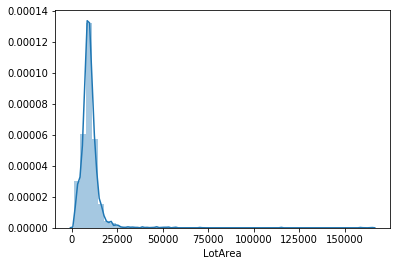

In [64]:
#Sample check for one column to make sure of the skewed distibution showed above
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['LotArea'])
#plt.xticks(rotation=30);

In [65]:
#5.1 Transformations
#get numeric features
numeric_features = [f for f in train_new_final.columns if train_new_final[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new_final[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new_final[skewed] = np.log1p(train_new_final[skewed])

In [66]:
#5.2 Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new_final[numeric_features])
scaled = scaler.transform(train_new_final[numeric_features])

for i, col in enumerate(numeric_features):
       train_new_final[col] = scaled[:,i]

In [67]:
train_new_final.info() #All columns are float64, int64 and uint8

print(train_new_final.shape)
    
train_new_final.head()

#All the feature transformations applies to the original varibales and values are changed and hence no new ones are created


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 1458
Columns: 176 entries, MSSubClass to TotalPorch
dtypes: float64(176)
memory usage: 3.8 MB
(2786, 176)


MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    0.415985 -0.072642     0.688631    -0.522354   1.051563      0.899151   
1   -1.121509  0.180376    -0.047565     2.199490   0.149308     -0.394796   
2    0.415985  0.494885     0.688631    -0.522354   0.984729      0.851227   
3    0.634863  0.170021     0.688631    -0.522354  -1.889118     -0.682340   
4    0.415985  0.965037     1.424827    -0.522354   0.951312      0.755379   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  MasVnrArea_imp  \
0 -0.760672  1.207915     -0.106945   0.642921  ...        1.230945   
1  0.486461 -0.859973     -0.106945  -0.338701  ...       -0.796826   
2 -0.529059  1.212184     -0.106945   0.783445  ...        1.158230   
3 -0.388995  1.170626     -0.106945   0.656122  ...       -0.796826   
4  0.173840  1.272008     -0.106945   1.454260  ...        1.452629   

   BsmtFinSF1_imp  BsmtFinSF2_imp  BsmtUnfSF_imp  BsmtFullBath_imp  \
0        0.777302       -0.363655      -0.369720          1.083941   
1        0.887461       -0.363655      -0.012742         -0.823741   
2        0.651147       -0.363655       0.224898          1.083941   
3        0.377572       -0.363655       0.347452          1.083941   
4        0.751964       -0.363655       0.292953          1.083941   

   BsmtHalfBath_imp  GarageYrBlt_imp  GarageCars_imp  TotalBath  TotalPorch  
0         -0.254689         0.971807        0.338986   1.314022    0.434364  
1          3.838786        -0.084249        0.338986  -0.004734   -1.463597  
2         -0.254689         0.893580        0.338986   1.314022    0.266080  
3         -0.254689         0.776241        1.680485  -0.004734    1.171526  
4         -0.254689         0.854467        1.680485   1.314022    0.579462  

[5 rows x 176 columns]

In [68]:
#Checking skewness after Transformation and Scaling to make verify whether skewness is improved
#You can notice that skewness is completed reduced for all varaibles when you compare skewness here and at the staring step

train_new_final.skew().sort_values(ascending=False)

PoolArea               17.710716
Functional_Mod          9.652969
Neighborhood_BrDale     9.485485
ExterQual_Fa            9.485485
LowQualFinSF            9.385927
                         ...    
GarageCond_TA          -2.888004
Functional_Typ         -3.508219
LandSlope_Gtl          -4.301120
RoofMatl_CompShg       -8.890367
Heating_GasA           -8.890367
Length: 176, dtype: float64

In [69]:
#End of data prep steps

In [70]:
#Model Building Step 1:Now we are dividing train vs test into separately because we combined them before
##data prep steps


# train dataset
train_model = train_new_final.iloc[:ntrain,:]

# test dataset
test = train_new_final.iloc[ntrain:,:]

In [71]:
#Printing the shape of both
#Although train can have reduced number of rows due to removing/filtering obs due to outliers, test should have exactly
#same number of rows which exist in original data

print(train_model.shape)
print(test.shape)

(1327, 176)
(1459, 176)


In [72]:
#Model Building Step 2: Splitting the train data only into train vs test
#This is because the test data given in competitions doesn't have target variable which we cannot compare model performance
#splitting our train into train vs test will give you data from splitted train into test to compare model performance

from sklearn.model_selection import train_test_split

X = train_model
y = target

# training and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)

#The split above happens with 4 datasets= X_train, X_test, y_train, y_test
#Below, we analyze the data that is contained in all 4 sets

In [73]:
#X_train
print(X_train.shape)
X_train.head()

(1061, 176)


MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1433    0.415985  0.312416    -0.047565    -0.522354   0.951312      0.755379   
729    -0.559968 -0.673827    -1.519956    -0.522354  -1.554950     -1.640820   
1210    0.415985  0.489237    -0.047565    -0.522354   0.683977      0.371987   
190     0.634863  0.371250     1.424827     2.199490  -1.321032      0.467835   
290     0.415985  1.144536     1.424827    -0.522354   1.151813      1.042923   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  MasVnrArea_imp  \
1433 -0.385653  1.199194     -0.106945   0.794283  ...        1.415939   
729  -0.790833 -0.859973      9.692207  -0.479988  ...       -0.796826   
1210 -0.089183  1.184083     -0.106945   0.888475  ...       -0.796826   
190   1.144957  1.306337     -0.106945   2.151271  ...       -0.796826   
290  -0.016914  1.202858     -0.106945   1.015561  ...       -0.796826   

      BsmtFinSF1_imp  BsmtFinSF2_imp  BsmtUnfSF_imp  BsmtFullBath_imp  \
1433       -1.443141       -0.363655       0.656130          1.083941   
729         0.259305       -0.363655       0.432150         -0.823741   
1210       -1.443141       -0.363655       0.723322         -0.823741   
190         0.484921       -0.363655       0.363832         -0.823741   
290        -1.443141       -0.363655       0.735951         -0.823741   

      BsmtHalfBath_imp  GarageYrBlt_imp  GarageCars_imp  TotalBath  TotalPorch  
1433         -0.254689         0.854467        0.338986   1.314022   -1.463597  
729          -0.254689        -0.631834        0.338986  -1.323489    0.795604  
1210         -0.254689         0.541562        0.338986  -0.004734    0.676637  
190          -0.254689        -1.805229        0.338986  -0.004734    0.521903  
290          -0.254689         1.089146        0.338986  -0.004734    0.353476  

[5 rows x 176 columns]

In [74]:
#X_test
print(X_test.shape)
X_test.head()

(266, 176)


MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
419    -1.121509 -0.072642    -0.783761     0.384927  -0.118026     -0.778188   
1313    0.415985  1.035257     2.161023    -0.522354   0.917895      0.707455   
556    -1.121509  1.045432    -0.783761    -0.522354  -0.485612     -1.305352   
958    -1.121509 -0.072642     0.688631    -0.522354   1.051563      0.899151   
117    -1.121509 -0.052562    -0.783761    -0.522354   1.151813      1.090847   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  MasVnrArea_imp  \
419  -0.086139 -0.859973     -0.106945  -0.914424  ...       -0.796826   
1313  0.870041  1.306077     -0.106945   1.995882  ...        1.165230   
556   0.021565 -0.859973     -0.106945  -0.806132  ...       -0.796826   
958   0.671972 -0.859973     -0.106945  -0.152178  ...       -0.796826   
117   0.117221 -0.859973     -0.106945  -0.709954  ...       -0.796826   

      BsmtFinSF1_imp  BsmtFinSF2_imp  BsmtUnfSF_imp  BsmtFullBath_imp  \
419         0.808817       -0.363655      -0.018689          1.083941   
1313       -1.443141       -0.363655       0.879379         -0.823741   
556         0.857479       -0.363655      -0.217429          1.083941   
958         0.773934       -0.363655       0.441014          1.083941   
117        -1.443141       -0.363655       0.759392         -0.823741   

      BsmtHalfBath_imp  GarageYrBlt_imp  GarageCars_imp  TotalBath  TotalPorch  
419          -0.254689        -0.397155       -1.002513  -0.004734    1.110970  
1313         -0.254689         0.815354        1.680485  -0.004734    0.115604  
556          -0.254689        -0.827399       -1.002513  -0.004734    0.749400  
958          -0.254689         0.971807        0.338986   1.314022    0.232822  
117          -0.254689         1.128259        0.338986  -1.323489    0.456094  

[5 rows x 176 columns]

In [75]:
#y_train
print(y_train.shape)
y_train.head()

(1061,)


1433    12.136187
729     11.542484
1210    12.149502
190     12.660328
290     12.359780
Name: SalePrice, dtype: float64

In [76]:
#y_train
print(y_test.shape)
y_test.head()

(266,)


419     11.863582
1313    12.716402
556     11.856515
958     12.128111
117     11.951180
Name: SalePrice, dtype: float64

In [77]:
#Learning the concept of Root Mean Square Error before building any model
#as it was used to evaluate each model

actual = [0, 1, 2, 0, 3]
predicted = [0.1, 1.3, 2.1, 0.5, 3.1]
from sklearn import metrics

mse = metrics.mean_squared_error(actual, predicted)

rmse = np.sqrt(mse)

print(rmse)

0.2720294101747089


In [81]:
#Model 1: Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

lr = LinearRegression()

lr.fit(X_train,y_train)

rmse = np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test)))
print(rmse)

mse = mean_squared_error(y_test,lr.predict(X_test))
print(mse)

mae = metrics.mean_absolute_error(y_test,lr.predict(X_test))
print(mae)



log_pred = model.predict(test)
actual_pred = np.exp(log_pred)

data_dict = {'Id':test_id,'SalePrice':actual_pred}


submit = pd.DataFrame(data_dict)
submit.to_csv('lin_submission.csv',index=False)


submit.head()

2217866170.5878353
4.918930350637949e+18
135986099.96587238


C:\Users\YVKCH\anaconda4\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


Id      SalePrice
0  1461  114496.682135
1  1462  180914.295784
2  1463  185342.550046
3  1464  202367.122344
4  1465  198772.715227

In [82]:
#Model 2: Ridge Regression Model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# different alpha values
alphas = [0.01, 0.1, 0.3, 1, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20]

for a in alphas:

    lr = Ridge(alpha=a)
    
    lr.fit(X_train,y_train)
    
    rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
    print('For Alpha = ',a,', RMSE = ',rmse)
    

#Based on RMSE value we can insert the alpha value below manually or try different aplha value by submitting predictions
model = Ridge(alpha=10)
model.fit(X_train,y_train)


#The target variable before data prep steps is transformed as there is skewed distribution with target variable
#They need to be inverted using exp function to get the predictions in original format

import numpy as np
log_pred = model.predict(test)
actual_pred = np.exp(log_pred)



data_dict = {'Id':test_id,'SalePrice':actual_pred}

submit = pd.DataFrame(data_dict)
submit.to_csv('ridge_reg_submission.csv',index=False)


submit.head()

For Alpha =  0.01 , RMSE =  0.10369594830802834
For Alpha =  0.1 , RMSE =  0.10371183934273387
For Alpha =  0.3 , RMSE =  0.10374592513961098
For Alpha =  1 , RMSE =  0.10384439918510983
For Alpha =  3 , RMSE =  0.10398509256721145
For Alpha =  5 , RMSE =  0.10402896598836509
For Alpha =  9 , RMSE =  0.1040246190664058
For Alpha =  10 , RMSE =  0.10401546765134623
For Alpha =  11 , RMSE =  0.10400467717222778
For Alpha =  12 , RMSE =  0.10399266441658783
For Alpha =  13 , RMSE =  0.10397974089228137
For Alpha =  14 , RMSE =  0.10396614415003659
For Alpha =  15 , RMSE =  0.10395205841249
For Alpha =  16 , RMSE =  0.10393762856742508
For Alpha =  17 , RMSE =  0.1039229699115339
For Alpha =  18 , RMSE =  0.10390817509474964
For Alpha =  19 , RMSE =  0.10389331917278245
For Alpha =  20 , RMSE =  0.10387846335149226


Id      SalePrice
0  1461  114947.597360
1  1462  170727.247368
2  1463  184217.547796
3  1464  201314.023793
4  1465  199705.453839

In [83]:
#Model 3: Lasso Regression Model

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# different alpha values
alphas = [0.01, 0.1, 0.3, 1, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20]

for a in alphas:

    lr = Lasso(alpha=a)
    
    lr.fit(X_train,y_train)
    
    rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
    print('For Alpha = ',a,', RMSE = ',rmse)
    

#Based on RMSE value we can insert the alpha value below manually or try different aplha value by submitting predictions
model = Lasso(alpha=10)
model.fit(X_train,y_train)


#The target variable before data prep steps is transformed as there is skewed distribution with target variable
#They need to be inverted using exp function to get the predictions in original format

import numpy as np
log_pred = model.predict(test)
actual_pred = np.exp(log_pred)



data_dict = {'Id':test_id,'SalePrice':actual_pred}

submit = pd.DataFrame(data_dict)
submit.to_csv('lasso_reg_submission.csv',index=False)


submit.head()

For Alpha =  0.01 , RMSE =  0.11079669875512749
For Alpha =  0.1 , RMSE =  0.19866375560885133
For Alpha =  0.3 , RMSE =  0.3486790276677719
For Alpha =  1 , RMSE =  0.3486790276677719
For Alpha =  3 , RMSE =  0.3486790276677719
For Alpha =  5 , RMSE =  0.3486790276677719
For Alpha =  9 , RMSE =  0.3486790276677719
For Alpha =  10 , RMSE =  0.3486790276677719
For Alpha =  11 , RMSE =  0.3486790276677719
For Alpha =  12 , RMSE =  0.3486790276677719
For Alpha =  13 , RMSE =  0.3486790276677719
For Alpha =  14 , RMSE =  0.3486790276677719
For Alpha =  15 , RMSE =  0.3486790276677719
For Alpha =  16 , RMSE =  0.3486790276677719
For Alpha =  17 , RMSE =  0.3486790276677719
For Alpha =  18 , RMSE =  0.3486790276677719
For Alpha =  19 , RMSE =  0.3486790276677719
For Alpha =  20 , RMSE =  0.3486790276677719


Id      SalePrice
0  1461  163699.753145
1  1462  163699.753145
2  1463  163699.753145
3  1464  163699.753145
4  1465  163699.753145

In [84]:
#Model 4: XG Boost Regressor - You can implement the same version of XG boost with different hyper parameters and try the Kaggle submissions
#You can also perform Hyper paramter tuning

import xgboost
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)
xg=best_xgb_model.fit(X_train,y_train)

rmse = np.sqrt(metrics.mean_squared_error(y_test,xg.predict(X_test)))
print(rmse)


import numpy as np
log_pred = best_xgb_model.predict(test)
actual_pred = np.exp(log_pred)

data_dict = {'Id':test_id,'SalePrice':actual_pred}

submit = pd.DataFrame(data_dict)
submit.to_csv('xgboost_submission.csv',index=False)

submit.head()

[11:00:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:00:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1058648719316948


Id      SalePrice
0  1461  130782.265625
1  1462  158651.828125
2  1463  183209.453125
3  1464  191616.796875
4  1465  192716.015625

In [92]:
#Model 5: Polynomial Regression (with 2 degrees of feature interaction)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def create_polynomial_regression_model(degree):
    #"Creates a polynomial regression model for the given degree"

    poly_features = PolynomialFeatures(degree=degree)

      # transform the features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

      # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

      # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

      # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

      # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

      # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    
    log_pred = poly_model.predict(poly_features.fit_transform(test))

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    

create_polynomial_regression_model(2)



import numpy as np
actual_pred = np.exp(log_pred)

data_dict = {'Id':test_id,'SalePrice':actual_pred}

submit = pd.DataFrame(data_dict)
submit.to_csv('polynomial_reg_submission.csv',index=False)

submit.head()

The model performance for the training set
-------------------------------------------
RMSE of training set is 2.4607155139977742e-15
R2 score of training set is 1.0


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.1801680553354208
R2 score of test set is 0.7321804991384073


Id      SalePrice
0  1461  130782.265625
1  1462  158651.828125
2  1463  183209.453125
3  1464  191616.796875
4  1465  192716.015625